In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.resnet_v2 import ResNet101V2
from matplotlib import pyplot as plt

In [5]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [6]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [7]:
pathTrain = 'Brain_Data_Organised/Train'
pathTest = 'Brain_Data_Organised/Test'

In [8]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [9]:
base_model = ResNet101V2(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

171327488/171317808 [==============================] - 84s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 543s 7s/step - loss: 3.0900 - accuracy: 0.7210 - val_loss: 0.5339 - val_accuracy: 0.7840
Epoch 2/10
71/71 [==============================] - 501s 7s/step - loss: 0.1646 - accuracy: 0.9498 - val_loss: 0.5778 - val_accuracy: 0.7840
Epoch 3/10
71/71 [==============================] - 481s 7s/step - loss: 0.0619 - accuracy: 0.9933 - val_loss: 0.4722 - val_accuracy: 0.8200
Epoch 4/10
71/71 [==============================] - 481s 7s/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.6028 - val_accuracy: 0.8120
Epoch 5/10
71/71 [==============================] - 489s 7s/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.6265 - val_accuracy: 0.8080
Epoch 6/10
71/71 [==============================] - 487s 7s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.5625 - val_accuracy: 0.8360
Epoch 7/10
71/71 [==============================] - 485s 7s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6294 - val_accuracy: 0.8200
Epoch 8/10
71

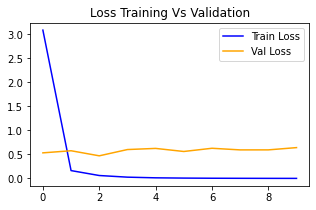

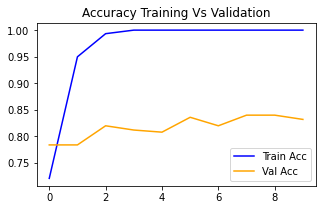

In [11]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [13]:
import pandas as pd

In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.090017,0.721013,0.533943,0.784
1,0.164620,0.949800,0.577841,0.784
2,0.061924,0.993336,0.472173,0.820
3,0.027793,1.000000,0.602846,0.812
4,0.013882,1.000000,0.626527,0.808
5,0.008325,1.000000,0.562536,0.836
6,0.005263,1.000000,0.629381,0.820
7,0.003758,1.000000,0.595634,0.840
8,0.002768,1.000000,0.596031,0.840
9,0.002154,1.000000,0.643111,0.832
